In [1]:
!pip install networkx pulp gurobipy ortools matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


In [ ]:
from pulp import LpMinimize, LpProblem, LpVariable, lpSum, LpBinary

# Sample Data
num_facilities = 3
num_customers = 4
opening_costs = [100, 200, 150]
service_costs = [[20, 24, 11], [18, 22, 30], [25, 15, 17], [22, 19, 30]]

# Decision Variables
x = [[LpVariable(f"x_{i}_{j}", cat=LpBinary) for j in range(num_facilities)] for i in range(num_customers)]
y = [LpVariable(f"y_{j}", cat=LpBinary) for j in range(num_facilities)]

# Define Problem
prob = LpProblem("Facility_Location", LpMinimize)

# Objective Function
prob += lpSum(y[j] * opening_costs[j] for j in range(num_facilities)) + \
        lpSum(service_costs[i][j] * x[i][j] for i in range(num_customers) for j in range(num_facilities))

# Constraints
for i in range(num_customers):
    prob += lpSum(x[i][j] for j in range(num_facilities)) == 1  # Each customer assigned to one facility

for j in range(num_facilities):
    for i in range(num_customers):
        prob += x[i][j] <= y[j]  # Customer can be assigned only if facility is open

# Solve
prob.solve()
print("Facility Open:", [y[j].varValue for j in range(num_facilities)])
print("Customer Assignments:", [[x[i][j].varValue for j in range(num_facilities)] for i in range(num_customers)])


Facility Open: [1.0, 0.0, 0.0]
Customer Assignments: [[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0]]


In [ ]:
import gurobipy as gp
from gurobipy import GRB

# Sample Data
num_facilities = 3
num_customers = 4
opening_costs = [100, 200, 150]
service_costs = [[20, 24, 11], [18, 22, 30], [25, 15, 17], [22, 19, 30]]

# Model
m = gp.Model("Facility_Location")

# Decision Variables
x = m.addVars(num_customers, num_facilities, vtype=GRB.BINARY, name="x")
y = m.addVars(num_facilities, vtype=GRB.BINARY, name="y")

# Objective Function
m.setObjective(gp.quicksum(y[j] * opening_costs[j] for j in range(num_facilities)) +
               gp.quicksum(service_costs[i][j] * x[i, j] for i in range(num_customers) for j in range(num_facilities)),
               GRB.MINIMIZE)

# Constraints
for i in range(num_customers):
    m.addConstr(gp.quicksum(x[i, j] for j in range(num_facilities)) == 1)  # Each customer assigned to one facility

for j in range(num_facilities):
    for i in range(num_customers):
        m.addConstr(x[i, j] <= y[j])  # Customer can be assigned only if facility is open

# Solve
m.optimize()

# Output
print("Facility Open:", [y[j].x for j in range(num_facilities)])
print("Customer Assignments:", [[x[i, j].x for j in range(num_facilities)] for i in range(num_customers)])


Restricted license - for non-production use only - expires 2026-11-23
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 16 rows, 15 columns and 36 nonzeros
Model fingerprint: 0xe17c0e8c
Variable types: 0 continuous, 15 integer (15 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 326.0000000
Presolve removed 3 rows and 4 columns
Presolve time: 0.00s
Presolved: 13 rows, 11 columns, 30 nonzeros
Variable types: 0 continuous, 11 integer (11 binary)
Found heuristic solution: objective 318.0000000

Root relaxation: objective 1.850000e+02, 7 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Boun

In [ ]:
from ortools.linear_solver import pywraplp

# Sample Data
num_facilities = 3
num_customers = 4
opening_costs = [100, 200, 150]
service_costs = [[20, 24, 11], [18, 22, 30], [25, 15, 17], [22, 19, 30]]

# Solver
solver = pywraplp.Solver.CreateSolver("SCIP")

# Decision Variables
x = [[solver.BoolVar(f"x_{i}_{j}") for j in range(num_facilities)] for i in range(num_customers)]
y = [solver.BoolVar(f"y_{j}") for j in range(num_facilities)]

# Objective Function
solver.Minimize(
    sum(y[j] * opening_costs[j] for j in range(num_facilities)) +
    sum(service_costs[i][j] * x[i][j] for i in range(num_customers) for j in range(num_facilities))
)

# Constraints
for i in range(num_customers):
    solver.Add(sum(x[i][j] for j in range(num_facilities)) == 1)  # Each customer assigned to one facility

for j in range(num_facilities):
    for i in range(num_customers):
        solver.Add(x[i][j] <= y[j])  # Customer can be assigned only if facility is open

# Solve
solver.Solve()

# Output
print("Facility Open:", [y[j].solution_value() for j in range(num_facilities)])
print("Customer Assignments:", [[x[i][j].solution_value() for j in range(num_facilities)] for i in range(num_customers)])


Facility Open: [1.0, 0.0, 0.0]
Customer Assignments: [[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0]]


In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pulp
import gurobipy as gp
from gurobipy import GRB
from ortools.linear_solver import pywraplp

# Function to generate random problem data
def generate_data(num_customers, num_facilities=5):
    np.random.seed(42)  # For reproducibility
    opening_costs = np.random.randint(100, 500, size=num_facilities).tolist()
    service_costs = np.random.randint(10, 50, size=(num_customers, num_facilities)).tolist()
    return opening_costs, service_costs

# PuLP Solver
def solve_pulp(num_customers, num_facilities=5):
    opening_costs, service_costs = generate_data(num_customers, num_facilities)
    prob = pulp.LpProblem("Facility_Location", pulp.LpMinimize)
    x = [[pulp.LpVariable(f"x_{i}_{j}", cat=pulp.LpBinary) for j in range(num_facilities)] for i in range(num_customers)]
    y = [pulp.LpVariable(f"y_{j}", cat=pulp.LpBinary) for j in range(num_facilities)]

    prob += pulp.lpSum(y[j] * opening_costs[j] for j in range(num_facilities)) + \
            pulp.lpSum(service_costs[i][j] * x[i][j] for i in range(num_customers) for j in range(num_facilities))

    for i in range(num_customers):
        prob += pulp.lpSum(x[i][j] for j in range(num_facilities)) == 1

    for j in range(num_facilities):
        for i in range(num_customers):
            prob += x[i][j] <= y[j]

    start_time = time.time()
    prob.solve()
    return time.time() - start_time

# Gurobi Solver
def solve_gurobi(num_customers, num_facilities=5):
    opening_costs, service_costs = generate_data(num_customers, num_facilities)
    m = gp.Model("Facility_Location")
    x = m.addVars(num_customers, num_facilities, vtype=GRB.BINARY, name="x")
    y = m.addVars(num_facilities, vtype=GRB.BINARY, name="y")

    m.setObjective(gp.quicksum(y[j] * opening_costs[j] for j in range(num_facilities)) +
                   gp.quicksum(service_costs[i][j] * x[i, j] for i in range(num_customers) for j in range(num_facilities)),
                   GRB.MINIMIZE)

    for i in range(num_customers):
        m.addConstr(gp.quicksum(x[i, j] for j in range(num_facilities)) == 1)

    for j in range(num_facilities):
        for i in range(num_customers):
            m.addConstr(x[i, j] <= y[j])

    m.setParam('OutputFlag', 0)  # Suppress output
    start_time = time.time()
    m.optimize()
    return time.time() - start_time

# OR-Tools Solver
def solve_ortools(num_customers, num_facilities=100):
    opening_costs, service_costs = generate_data(num_customers, num_facilities)
    solver = pywraplp.Solver.CreateSolver("SCIP")
    x = [[solver.BoolVar(f"x_{i}_{j}") for j in range(num_facilities)] for i in range(num_customers)]
    y = [solver.BoolVar(f"y_{j}") for j in range(num_facilities)]

    solver.Minimize(
        sum(y[j] * opening_costs[j] for j in range(num_facilities)) +
        sum(service_costs[i][j] * x[i][j] for i in range(num_customers) for j in range(num_facilities))
    )

    for i in range(num_customers):
        solver.Add(sum(x[i][j] for j in range(num_facilities)) == 1)

    for j in range(num_facilities):
        for i in range(num_customers):
            solver.Add(x[i][j] <= y[j])

    start_time = time.time()
    solver.Solve()
    return time.time() - start_time

# Benchmarking
customer_sizes = [10, 50, 100, 200]
pulp_times = []
gurobi_times = []
ortools_times = []

for num_customers in customer_sizes:
    print(f"Solving for {num_customers} customers...")
    pulp_times.append(solve_pulp(num_customers))
    gurobi_times.append(solve_gurobi(num_customers))
    ortools_times.append(solve_ortools(num_customers))



Solving for 10 customers...
Restricted license - for non-production use only - expires 2026-11-23
Solving for 50 customers...
Solving for 100 customers...
Solving for 200 customers...


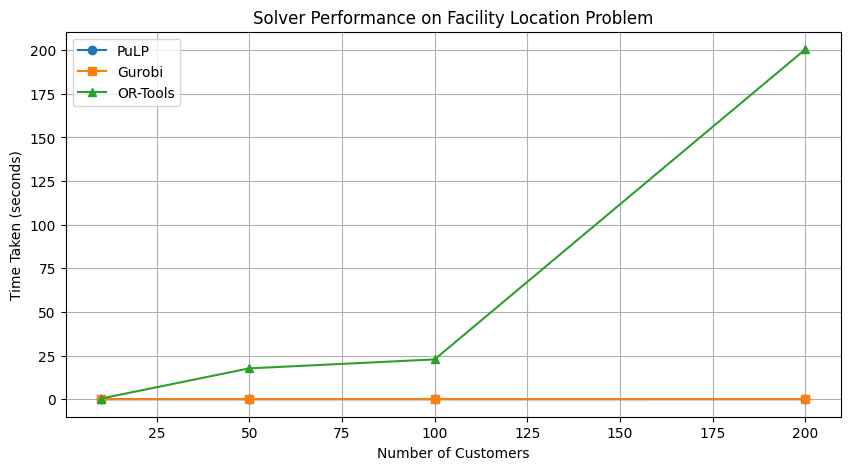

In [ ]:
# Plot Results  (same no of facility=100)
plt.figure(figsize=(10, 5))
plt.plot(customer_sizes, pulp_times, marker='o', label="PuLP")
plt.plot(customer_sizes, gurobi_times, marker='s', label="Gurobi")
plt.plot(customer_sizes, ortools_times, marker='^', label="OR-Tools")

plt.xlabel("Number of Customers")
plt.ylabel("Time Taken (seconds)")
plt.title("Solver Performance on Facility Location Problem")
plt.legend()
plt.grid()
plt.show()


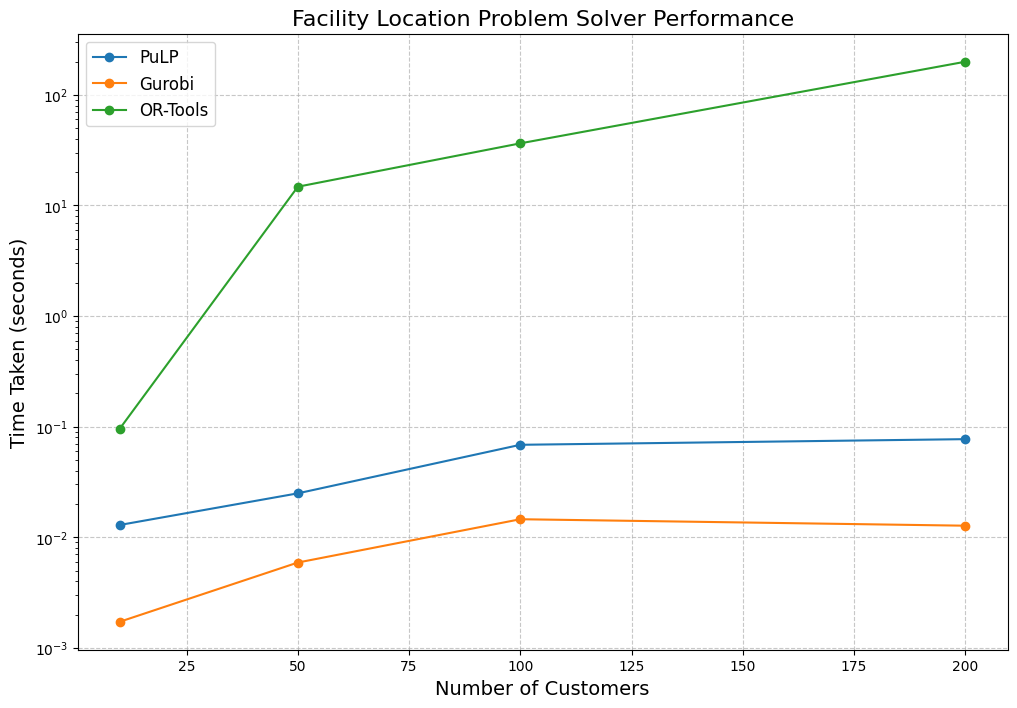

In [4]:
# Plot Results (same no of facility=5)
plt.figure(figsize=(12, 8))
plt.plot(customer_sizes, pulp_times, marker='o', label="PuLP")
plt.plot(customer_sizes, gurobi_times, marker='o', label="Gurobi")
plt.plot(customer_sizes, ortools_times, marker='o', label="OR-Tools")

plt.xlabel("Number of Customers",fontsize=14)
plt.ylabel("Time Taken (seconds)",fontsize=14)
plt.title("Facility Location Problem Solver Performance",fontsize=16)
plt.legend(fontsize=12)
plt.yscale('log')

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



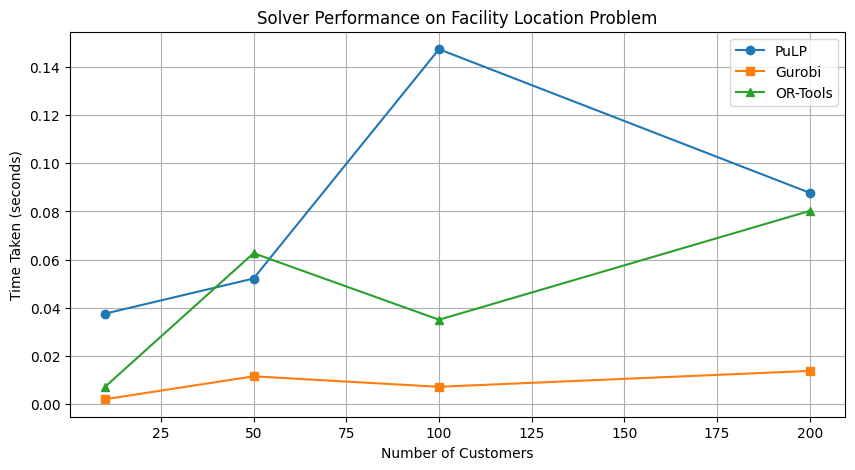

In [ ]:
# Plot Results (same no of facility=5)
plt.figure(figsize=(12, 8))
plt.plot(customer_sizes, pulp_times, marker='o', label="PuLP")
plt.plot(customer_sizes, gurobi_times, marker='o', label="Gurobi")
plt.plot(customer_sizes, ortools_times, marker='o', label="OR-Tools")

plt.xlabel("Number of Customers",fontsize=14)
plt.ylabel("Time Taken (seconds)",fontsize=14)
plt.title("Facility Location Problem Solver Performance",fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from pulp import LpMinimize, LpProblem, LpVariable, lpSum, LpBinary, PULP_CBC_CMD
import gurobipy as gp
from gurobipy import GRB
from ortools.linear_solver import pywraplp

# Function to generate random data
def generate_data(num_facilities):
    num_customers = 2 * num_facilities  # Keeping customers proportional
    np.random.seed(42)  # For reproducibility
    opening_costs = np.random.randint(50, 500, size=num_facilities).tolist()
    service_costs = np.random.randint(10, 50, size=(num_customers, num_facilities)).tolist()
    return num_facilities, num_customers, opening_costs, service_costs

# Function to solve FLP using PuLP
def solve_pulp(num_facilities, num_customers, opening_costs, service_costs):
    start_time = time.time()
    prob = LpProblem("Facility_Location", LpMinimize)

    x = [[LpVariable(f"x_{i}_{j}", cat=LpBinary) for j in range(num_facilities)] for i in range(num_customers)]
    y = [LpVariable(f"y_{j}", cat=LpBinary) for j in range(num_facilities)]

    prob += lpSum(y[j] * opening_costs[j] for j in range(num_facilities)) + \
            lpSum(service_costs[i][j] * x[i][j] for i in range(num_customers) for j in range(num_facilities))

    for i in range(num_customers):
        prob += lpSum(x[i][j] for j in range(num_facilities)) == 1

    for j in range(num_facilities):
        for i in range(num_customers):
            prob += x[i][j] <= y[j]

    prob.solve(PULP_CBC_CMD(msg=False))  # Solve silently
    return time.time() - start_time

# Function to solve FLP using Gurobi
def solve_gurobi(num_facilities, num_customers, opening_costs, service_costs):
    start_time = time.time()
    m = gp.Model("Facility_Location")
    m.setParam("OutputFlag", 0)  # Disable solver output

    x = m.addVars(num_customers, num_facilities, vtype=GRB.BINARY, name="x")
    y = m.addVars(num_facilities, vtype=GRB.BINARY, name="y")

    m.setObjective(gp.quicksum(y[j] * opening_costs[j] for j in range(num_facilities)) +
                   gp.quicksum(service_costs[i][j] * x[i, j] for i in range(num_customers) for j in range(num_facilities)),
                   GRB.MINIMIZE)

    for i in range(num_customers):
        m.addConstr(gp.quicksum(x[i, j] for j in range(num_facilities)) == 1)

    for j in range(num_facilities):
        for i in range(num_customers):
            m.addConstr(x[i, j] <= y[j])

    m.optimize()
    return time.time() - start_time

# Function to solve FLP using Google OR-Tools
def solve_ortools(num_facilities, num_customers, opening_costs, service_costs):
    start_time = time.time()
    solver = pywraplp.Solver.CreateSolver("SCIP")

    x = [[solver.BoolVar(f"x_{i}_{j}") for j in range(num_facilities)] for i in range(num_customers)]
    y = [solver.BoolVar(f"y_{j}") for j in range(num_facilities)]

    solver.Minimize(
        sum(y[j] * opening_costs[j] for j in range(num_facilities)) +
        sum(service_costs[i][j] * x[i][j] for i in range(num_customers) for j in range(num_facilities))
    )

    for i in range(num_customers):
        solver.Add(sum(x[i][j] for j in range(num_facilities)) == 1)

    for j in range(num_facilities):
        for i in range(num_customers):
            solver.Add(x[i][j] <= y[j])

    solver.Solve()
    return time.time() - start_time

# Running experiments
facility_sizes = list(range(5, 31, 5))  # Testing for facilities from 5 to 50
pulp_times, gurobi_times, ortools_times = [], [], []

for size in facility_sizes:
    print(size)
    num_facilities, num_customers, opening_costs, service_costs = generate_data(size)

    pulp_times.append(solve_pulp(num_facilities, num_customers, opening_costs, service_costs))
    gurobi_times.append(solve_gurobi(num_facilities, num_customers, opening_costs, service_costs))
    ortools_times.append(solve_ortools(num_facilities, num_customers, opening_costs, service_costs))

5
10
15
20
25
30


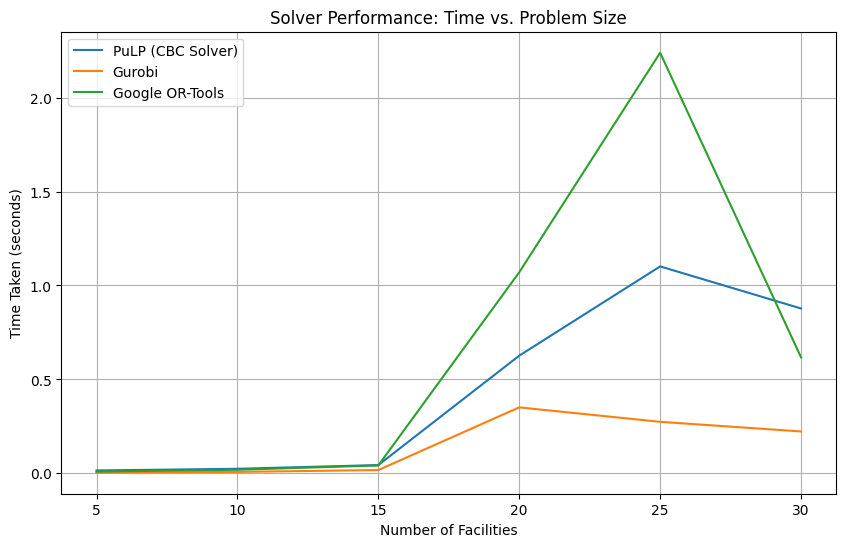

In [ ]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(facility_sizes, pulp_times, label="PuLP (CBC Solver)")
plt.plot(facility_sizes, gurobi_times, label="Gurobi")
plt.plot(facility_sizes, ortools_times,label="Google OR-Tools")

plt.xlabel("Number of Facilities")
plt.ylabel("Time Taken (seconds)")
plt.title("Solver Performance: Time vs. Problem Size")
plt.legend()
plt.grid(True)
plt.show()